## Import the required packages

In [81]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Import the test set

In [82]:
df = pd.read_csv('test_set_final.csv')

In [83]:
df.head()

,Translation,adjusted_label,predicted_label,is_correct
0,Sofia. Lilyana Georgieva and her 13-year-old d...,neutral,neutral,True
1,Ever since Velina's father abandoned her famil...,sadness,happiness,False
2,There is almost no desire that Liliana does no...,happiness,happiness,True
3,Velina has a very difficult time to make a sta...,sadness,sadness,True
4,So I allowed myself to buy her whatever she wa...,neutral,neutral,True


In [84]:
df.columns

Index(['Translation', 'adjusted_label', 'predicted_label', 'is_correct'], dtype='object')

In [86]:
# Check the distribution of correct vs incorrect predictions
df['is_correct'].value_counts()

is_correct
True     676
False    265
Name: count, dtype: int64

In [87]:
df['adjusted_label'].value_counts()

adjusted_label
neutral      389
anger        237
happiness    142
sadness      129
fear          26
surprise      15
disgust        3
Name: count, dtype: int64

In [88]:
df['predicted_label'].value_counts()

predicted_label
neutral      389
happiness    212
anger        173
sadness      119
surprise      30
fear          14
disgust        4
Name: count, dtype: int64

### Check the sentence length for True/False predictions

In [89]:
# Add sentence length column (in words)
df["sentence_length"] = df["Translation"].apply(lambda x: len(str(x).split()))

# Compare average sentence length for correct vs incorrect predictions
length_stats = df.groupby("is_correct")["sentence_length"].agg(["mean", "std", "count"]).reset_index()
length_stats.rename(columns={"is_correct": "Prediction Correctness"}, inplace=True)
print("🔍 Sentence Length Stats:\n", length_stats)

🔍 Sentence Length Stats:
    Prediction Correctness      mean       std  count
0                   False  7.188679  3.441374    265
1                    True  6.489645  3.457879    676


### Calculate precision, recall, f1 pre-class

In [93]:
# Get classification report
report = classification_report(df["adjusted_label"], df["predicted_label"], output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Drop the avg/total rows for now
report_df = report_df.loc[df["adjusted_label"].unique()]
print("🔍 Per-Class Performance:\n", report_df[["precision", "recall", "f1-score"]])


🔍 Per-Class Performance:
            precision    recall  f1-score
neutral     0.768638  0.768638  0.768638
sadness     0.731092  0.674419  0.701613
happiness   0.608491  0.908451  0.728814
anger       0.774566  0.565401  0.653659
fear        0.714286  0.384615  0.500000
surprise    0.500000  1.000000  0.666667
disgust     0.500000  0.666667  0.571429


### Print F1-Scores for the model

In [94]:
# Now compare with actual labels
true_labels = df['adjusted_label'].str.lower().tolist()
pred_labels = df['predicted_label'].tolist()

# Evaluate
f1_macro = f1_score(true_labels, pred_labels, average='macro')
f1_micro = f1_score(true_labels, pred_labels, average='micro')
f1_weighted = f1_score(true_labels, pred_labels, average='weighted')


print(f"F1 Macro: {f1_macro:.4f}")
print(f"F1 Micro: {f1_micro:.4f}")
print(f"F1 Weighted: {f1_weighted:.4f}")

F1 Macro: 0.6558
F1 Micro: 0.7184
F1 Weighted: 0.7148


### Confusion Matrix of the predictions

In [95]:
EMOTIONS = df['adjusted_label'].unique()
EMOTIONS

array(['neutral', 'sadness', 'happiness', 'anger', 'fear', 'surprise',
       'disgust'], dtype=object)

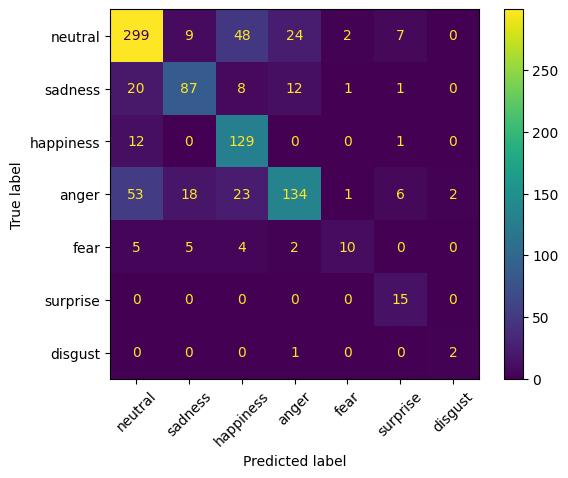

In [96]:

ConfusionMatrixDisplay.from_predictions(true_labels, pred_labels, labels=EMOTIONS, xticks_rotation=45)

### Check the class distribution

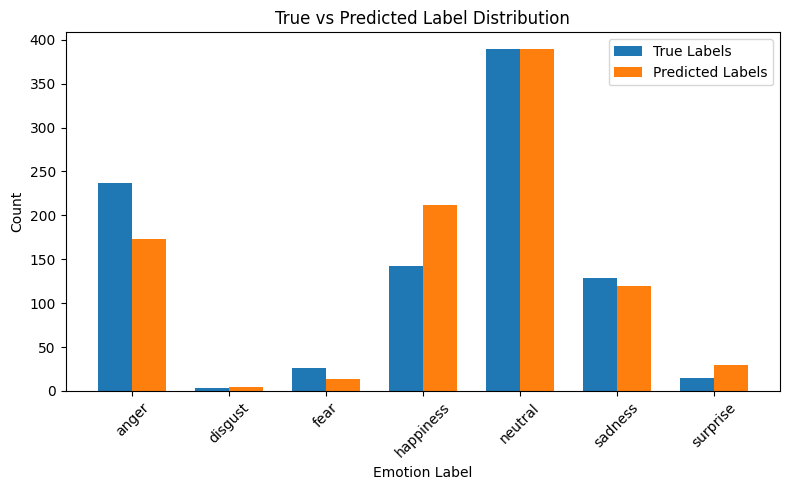

In [97]:
import matplotlib.pyplot as plt

# True label distribution
true_counts = df["adjusted_label"].value_counts().sort_index()
pred_counts = df["predicted_label"].value_counts().sort_index()

# Bar chart of label distributions
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
index = range(len(true_counts))

plt.bar(index, true_counts, bar_width, label="True Labels")
plt.bar([i + bar_width for i in index], pred_counts, bar_width, label="Predicted Labels")
plt.xticks([i + bar_width / 2 for i in index], true_counts.index, rotation=45)
plt.xlabel("Emotion Label")
plt.ylabel("Count")
plt.title("True vs Predicted Label Distribution")
plt.legend()
plt.tight_layout()
plt.show()


### Print confusion matrix of per-class percentages of correct predictions

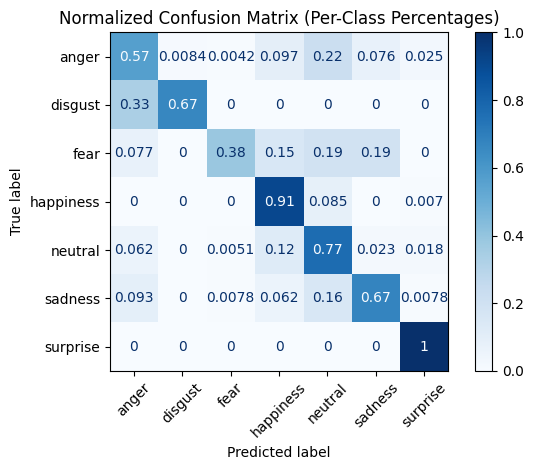

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = sorted(df["adjusted_label"].unique())
cm_normalized = confusion_matrix(df["adjusted_label"], df["predicted_label"], labels=labels, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=labels)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Normalized Confusion Matrix (Per-Class Percentages)")
plt.tight_layout()
plt.show()


### Plot the error rate per class

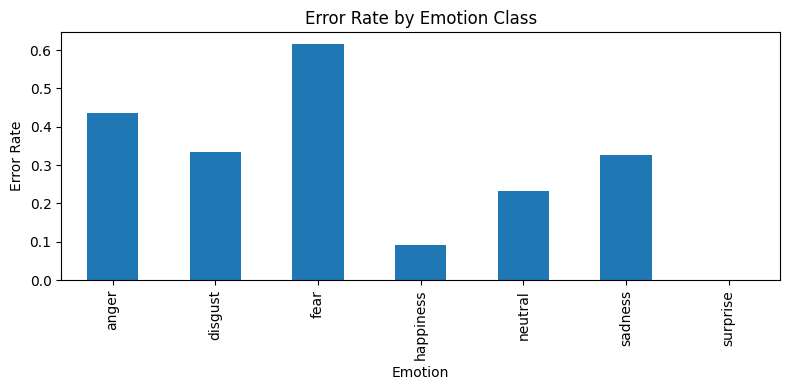

In [99]:
error_counts = mismatches["adjusted_label"].value_counts().sort_index()
total_counts = df["adjusted_label"].value_counts().sort_index()
error_rate = (error_counts / total_counts).fillna(0)

# Plot
error_rate.plot(kind='bar', figsize=(8, 4), title="Error Rate by Emotion Class")
plt.ylabel("Error Rate")
plt.xlabel("Emotion")
plt.tight_layout()
plt.show()

### Create df per each class that contain the mismatches

In [100]:
# Step 1: Get mismatches (incorrect predictions)
mismatches = df[df["predicted_label"] != df["adjusted_label"]]

# Step 2: Define the list of emotions
emotion_list = ["neutral", "happiness", "disgust", "anger", "sadness", "surprise", "fear"]

# Step 3: Create a separate DataFrame for each emotion
neutral_df = mismatches[mismatches["adjusted_label"] == "neutral"][["Translation", "adjusted_label", "predicted_label"]]
happiness_df = mismatches[mismatches["adjusted_label"] == "happiness"][["Translation", "adjusted_label", "predicted_label"]]
disgust_df = mismatches[mismatches["adjusted_label"] == "disgust"][["Translation", "adjusted_label", "predicted_label"]]
anger_df = mismatches[mismatches["adjusted_label"] == "anger"][["Translation", "adjusted_label", "predicted_label"]]
sadness_df = mismatches[mismatches["adjusted_label"] == "sadness"][["Translation", "adjusted_label", "predicted_label"]]
surprise_df = mismatches[mismatches["adjusted_label"] == "surprise"][["Translation", "adjusted_label", "predicted_label"]]
fear_df = mismatches[mismatches["adjusted_label"] == "fear"][["Translation", "adjusted_label", "predicted_label"]]

print(f"\n anger_df: {anger_df.shape} \n neutral_df: {neutral_df.shape} \n sadness_df: {sadness_df.shape} \n fear_df: {fear_df.shape} \n happiness_df: {happiness_df.shape} \n disgust_df: {disgust_df.shape} \n surprise_df: {surprise_df.shape}")


 anger_df: (103, 3) 
 neutral_df: (90, 3) 
 sadness_df: (42, 3) 
 fear_df: (16, 3) 
 happiness_df: (13, 3) 
 disgust_df: (1, 3) 
 surprise_df: (0, 3)


### Check the incorrect predictions of neutral class

In [101]:
anger_df.head(40)

,Translation,adjusted_label,predicted_label
5,The relationship between mother and daughter g...,anger,happiness
7,I was horrified to see what this girl affords....,anger,disgust
8,And the worst part is that Lily for everything...,anger,happiness
12,"Due to Velina's behavior, scandals between Lil...",anger,neutral
21,Velina just doesn't know the measure. It must ...,anger,neutral
23,The situation in the family becomes crazy with...,anger,surprise
29,She must stop retreating and explain to Little...,anger,neutral
33,Theodore spoke with his girlfriend in advance ...,anger,happiness
39,"Come on, we're leaving.",anger,neutral
42,She talked Mom not to buy me clothes.,anger,neutral


### Check the incorrect predictions of happiness class

In [102]:
neutral_df.head(13)

,Translation,adjusted_label,predicted_label
34,"He is sure, however, that Velina will want to ...",neutral,happiness
37,Are you sure?,neutral,surprise
48,But I hope things will work out in the future.,neutral,happiness
53,"However, she is a mother.",neutral,happiness
90,Tomorrow will grow up and behave the same way.,neutral,happiness
91,"I had to talk to Lily,",neutral,fear
93,Nothing has happened. It can't.,neutral,anger
103,All teenagers are like that.,neutral,happiness
104,The next morning,neutral,anger
112,Not only there.,neutral,anger


### Check the incorrect predictions of disgust class

In [103]:
sadness_df.head()

,Translation,adjusted_label,predicted_label
1,Ever since Velina's father abandoned her famil...,sadness,happiness
49,This girl did a missed job.,sadness,happiness
70,"And more, how can a 13-year-old girls reach he...",sadness,neutral
73,If I had money ...,sadness,neutral
78,Not everything can be bought with money and gi...,sadness,happiness


### Check the incorrect predictions of anger class

In [104]:
fear_df.head(40)

,Translation,adjusted_label,predicted_label
20,I prefer to be left without money than to figh...,fear,happiness
30,"If this does not happen, we may be losses.",fear,sadness
61,You have to do something. It has become indisp...,fear,happiness
96,Her daughter's shot.,fear,sadness
137,with quite dangerous.,fear,neutral
272,"what my passion, not to lose theo,",fear,happiness
333,Well now if something bad happened to my daugh...,fear,sadness
487,"They fuse my daughter, don't let her beat her.",fear,neutral
575,They kill the children. Please.,fear,anger
616,"I am very conscientious that I took the dog,",fear,happiness


### Check the incorrect predictions of sadness class

In [105]:
happiness_df.head(42)

,Translation,adjusted_label,predicted_label
252,You have some idea to be together.,happiness,neutral
277,You have to show him that,happiness,neutral
308,I've been a vacation for a long time.,happiness,neutral
362,A friend came to his guess to play.,happiness,neutral
595,I think of Velina,happiness,neutral
620,Velina falls into real euphoria.,happiness,neutral
777,admits that he needs help,happiness,neutral
912,Velina and Nicholas no longer quarrel.,happiness,neutral
921,But Mom is not to blame.,happiness,surprise
928,And he starts to act like a real parent.,happiness,neutral


### Check the incorrect predictions of fear class

In [106]:
disgust_df.head(16)

,Translation,adjusted_label,predicted_label
764,is a very nasty postponement.,disgust,anger
